# CPSC 440 – Homework 2 

## Due in class on Tuesday, February 9, 2016



## 1.(3 points) Suppose that during the blizzard on Saturday, January 23, 2016, a total of 500 commercial airliners were stranded at the tarmac of New York City’s JFK airport. In order to be allowed to take off after the blizzard is over, each of these airliners must have less than 0.25 inches of ice on their wings. 

### a.	(1 point) Suppose that the distribution of the amount of ice on a given airliner’s wing after the blizzard follows a normal distribution with mean = 0.41 in and standard deviation = 0.08 in. What is the probability that a randomly selected airliner will have less than 0.25 inches of ice on their wings?


In [3]:
z <- (0.25-0.41)/0.08
p <- pnorm(z)
p

[1] 0.02275013

### b.	(1 points) Let X denote the number of aircraft that are allowed to take off after the blizzard (i.e., the number of aircraft that have less than 0.25 inches of ice on their wings). What kind of distribution does X follow? Be sure to define all parameters of this distribution.

$$
X \sim Binomial(n=500, p \approx 0.02)
$$

### c.	 (1 point) Calculate the estimated probability that 12 or more of these aircraft will be allowed to take off after the blizzard is over. Please feel free to use software to answer this, but please be sure to show your work.


In [4]:
1-pbinom(11, size=500, prob=p)

[1] 0.465924

## 2.	(3 points) Let Y1, Y2, …Y35 denote a random sample of 35 normal random variables, each identically distributed with mean  = 60 and variance = 900

### a.	(0.5 points) Calculate the estimated probability of one of these random variables having an observed value that exceeds 96.

In [30]:
1-pnorm(96, 60, sd=sqrt(900))

[1] 0.1150697

In [31]:
1-pnorm((36)/30)

[1] 0.1150697

### b.	(0.5 points) What is the sampling distribution of the sample mean ? Please comment on this distribution, in particular its mean and standard error.

$\bar{Y} \sim N(60, \sigma_{\bar{Y}} = 30/\sqrt{35})$

### c. 	(1 point) Calculate the estimated probability of the sample mean  exceeding 96. Is this estimated probability larger or smaller than the answer from part a.)? Why do you think you obtained this result?

In [5]:
1-pnorm(96, mean=60, sd=30/sqrt(35))
## much smaller probability, the probability is smaller due to the variance being smaller.

[1] 6.269429e-13

### d.	(1 point) Compare and contrast the standard deviation from the standard error. 

$$
\sigma_{\bar{Y}} = \frac{\sigma}{\sqrt{n}}
$$

So the standard error is a function of the standard deviation, we can think of the standard deviation as our standard measure of uncertainty around $Y_{i}$ for all $i=1,...,35$ and the standard error is a measure of our accuracy of the estimator $\bar{Y}$


## 3.	(2 points) An electrician is interested in assessing the amount of time it takes to remove knob and tube wiring from 144 old houses, each with similar amounts of wiring. After completing this test, the sample mean for the time to completion was = 5.00 days and the sample standard deviation was s = 1.75 days.
a.	(0.5 points) Calculate a 90% confidence interval for the population mean . Write down your interpretation.
b.	(0.5 points) Calculate a 95% confidence interval for the population mean . Write down your interpretation.
c.	 (0.5 points) Calculate a 99% confidence interval for the population mean . Write down your interpretation.
d.	(0.5 points) Explain why the size of the confidence intervals changed between parts a.)-c.). 


In [33]:
n <- 144
y_bar <- 5
s <- 1.75

alpha <- c(0.1, 0.05, 0.01)
t_crit <- qt(1-alpha/2, n-1)

ci <- matrix(NA, ncol=2, nrow=3)
colnames(ci) <- c("LB" ,"UB")
rownames(ci) <- 1-alpha
for(i in 1:3){
    ci[i,] <- y_bar + c(-1,1)*t_crit[i]*s/sqrt(144)
}

ci

,LB,UB
0.9,4.758561,5.241439
0.95,4.711732,5.288268
0.99,4.619281,5.380719


For each interval, the probability that $\mu \in [LB, UB]$ converges to $1-\alpha/2$ as $n \rightarrow \infty$, where the probability is over the random interval, not the fixed point $\mu$.

## The size of the interval changes because as we increase the prescribed level of confidence, we thus need to include more possible values into our interval


4.	(2 points) Draw and label the density function for a normal random variable with mean  = 90 and variance = 25. After this draw and label the density function (i.e., the sampling distribution) for the mean of a sample of four of these random variables. Finally, draw and label the density function of the mean of a sample of 30 of these random variables. 

No id variables; using all as measure variables


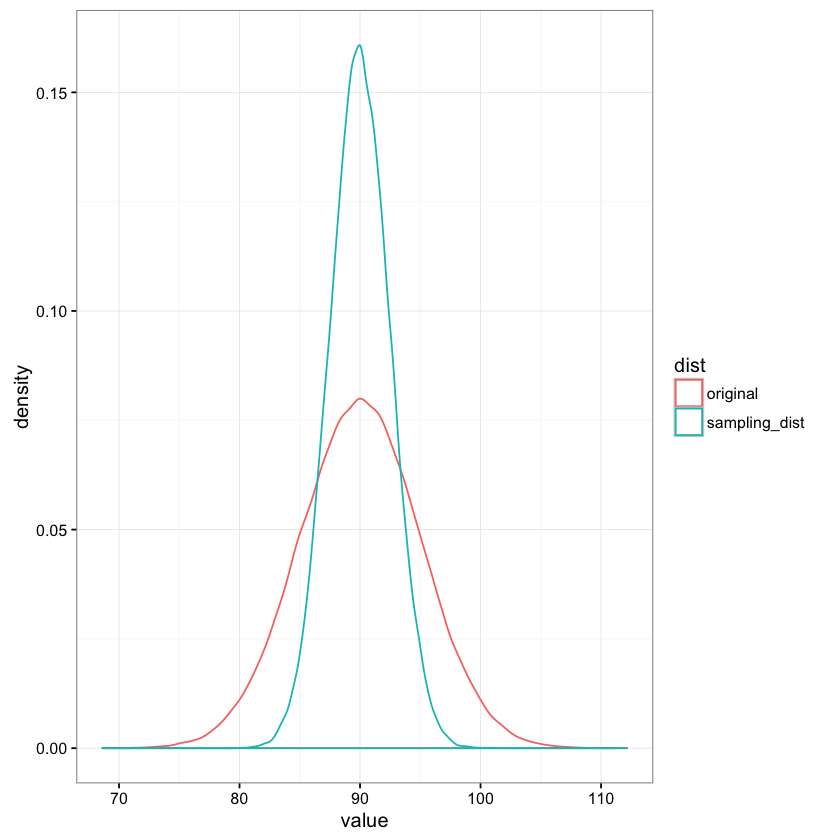

In [34]:

## ---- Don't change this function, or you risk it not working correctly!
norm_samp_dist_plot <- function(n, mean=0, sd=1, num_samples=100000){
    ## ---- load neccesary packages (but check first and make it easy to install 
    ## if not already there). 
    list_of_packages <- c("ggplot2", "reshape2")
    new_packages <- list_of_packages[!(list_of_packages %in% installed.packages()[,"Package"])]
    if(length(new.packages)>1) {
        install.packages(new_packages, repos="http://cran.rstudio.com/")
    }
    library(ggplot2)
    ## ---- simulate
    samps <- rnorm(num_samples, mean, sd)
    sd_samps <- rnorm(num_samples, mean, sd/sqrt(n))
    ## ---- collect
    dat <- data.frame(samps, sd_samps)
    colnames(dat) <- c("original", "sampling_dist")
    dat_m <- reshape2::melt(dat)
    colnames(dat_m)<-c("dist", "value")
    print(ggplot(dat_m, aes(value))+geom_density(aes(color=dist)) + theme_bw())
}


norm_samp_dist_plot(4, mean=90, sd=5)

No id variables; using all as measure variables


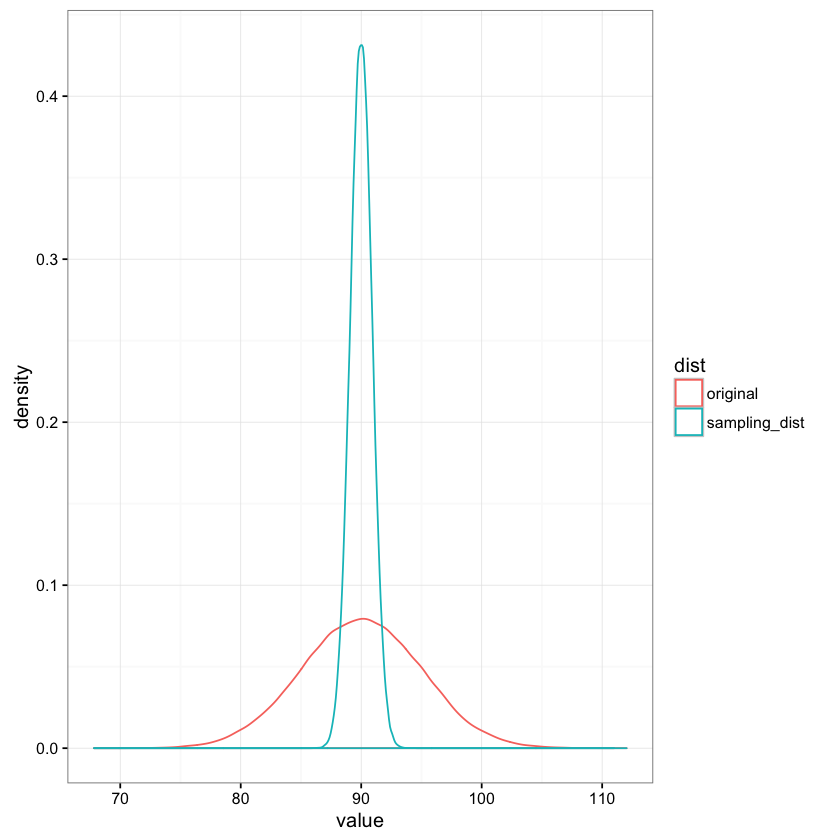

In [35]:
norm_samp_dist_plot(30, mean=90,sd=5)